Found 8142 images belonging to 5 classes.
Found 2033 images belonging to 5 classes.
Found 4339 images belonging to 5 classes.
Epoch 1/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.7684 - loss: 0.6215 - val_accuracy: 0.8303 - val_loss: 0.6423
Epoch 2/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - accuracy: 0.9384 - loss: 0.1656 - val_accuracy: 0.8578 - val_loss: 0.4821
Epoch 3/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9558 - loss: 0.1278 - val_accuracy: 0.8613 - val_loss: 0.5758
Epoch 4/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.9675 - loss: 0.0891 - val_accuracy: 0.8790 - val_loss: 0.4591
Epoch 5/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.9774 - loss: 0.0606 - val_accuracy: 0.8652 - val_loss: 0.9382
Epoch 6/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9810 - loss: 0.0555 - val_accuracy: 0.8751 - val_loss: 0.7395
Epoch 7/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.9855 - loss: 0.0378 - val_

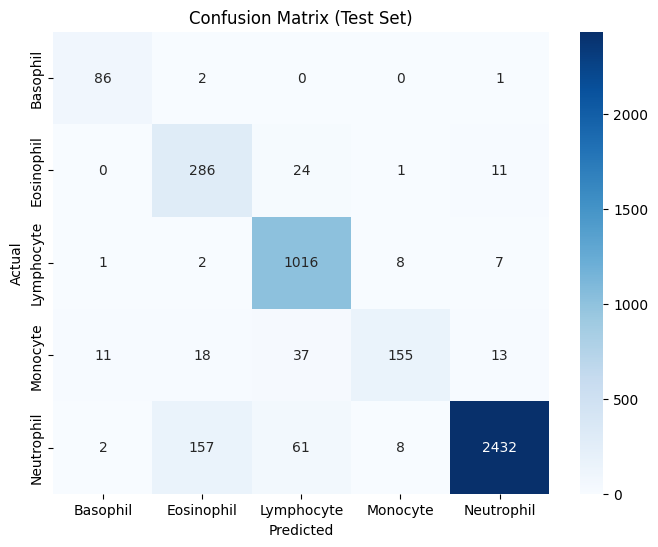

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

image_size = (150, 150)
batch_size = 15
train_dir = "/kaggle/input/white-blood-cells-dataset/Train"
test_dir = "/kaggle/input/white-blood-cells-dataset/Test-A"

train_datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

steps_test = int(np.ceil(test_generator.samples / test_generator.batch_size))
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator, steps=steps_test)
y_pred = np.argmax(y_pred_probs, axis=1)
class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()
